In [1]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd

In [2]:
# File to Load
heart_csv = Path("heart.csv")

#Read CSV data
heart_failure = pd.read_csv(heart_csv)
heart_failure.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
# Inspect the data
print(heart_failure.head())
print(heart_failure.info())
print(heart_failure.describe())

# Check for duplicates and remove them
heart_failure.drop_duplicates(inplace=True)


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_pred_lr))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        77
           1       0.89      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184

AUC: 0.832261196747178

Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

AUC: 0.8696443743172715


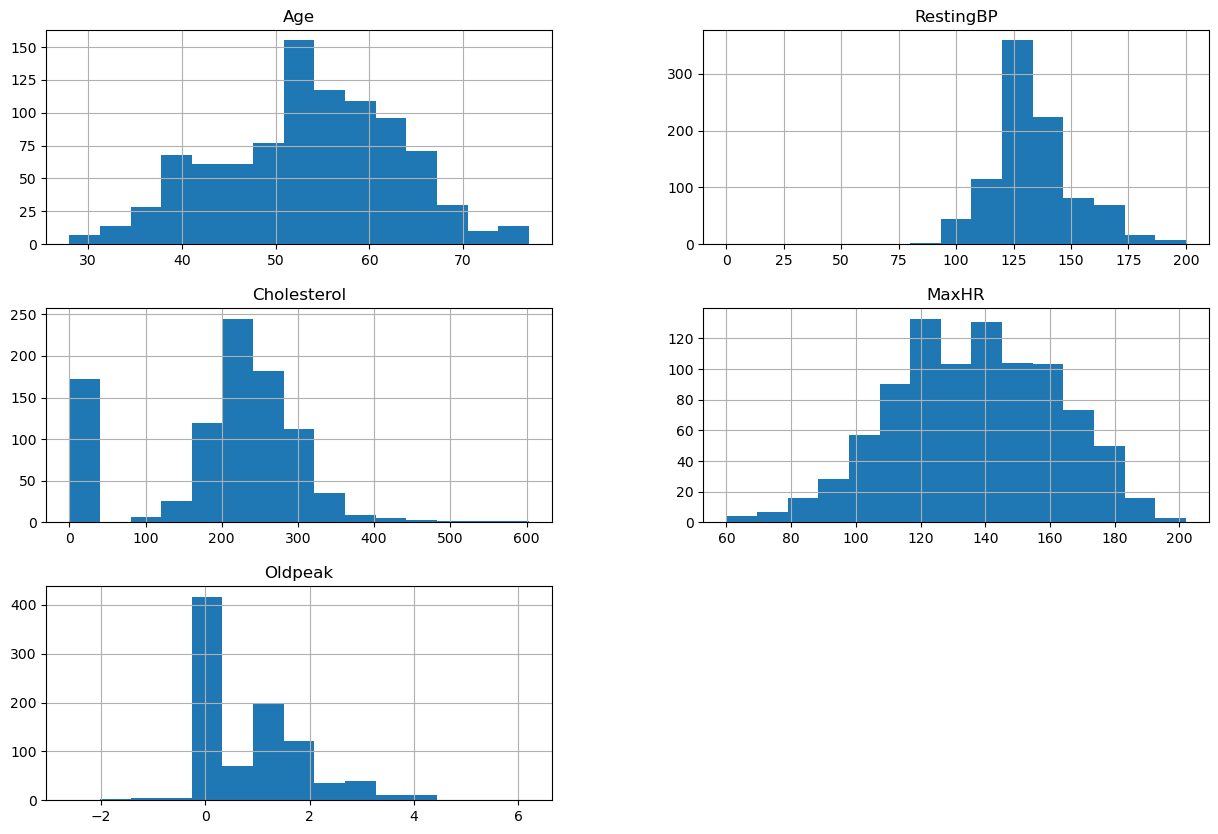

ValueError: could not convert string to float: 'M'

<Figure size 1000x800 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
heart_failure[numeric_features].hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_failure.corr(), annot=True, cmap='coolwarm')
plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [8]:
import gradio as gr

def predict_heart_failure(age, sex, chest_pain, bp, chol, fasting_bs, ecg, max_hr, angina, oldpeak, slope):
    input_data = pd.DataFrame({
        'Age': [age], 'Sex': [sex], 'ChestPainType': [chest_pain],
        'RestingBP': [bp], 'Cholesterol': [chol], 'FastingBS': [fasting_bs],
        'RestingECG': [ecg], 'MaxHR': [max_hr], 'ExerciseAngina': [angina],
        'Oldpeak': [oldpeak], 'ST_Slope': [slope]
    })
    input_data = preprocessor.transform(input_data)
    prediction = lr.predict(input_data)
    return "Heart Failure" if prediction[0] == 1 else "No Heart Failure"

interface = gr.Interface(
    fn=predict_heart_failure,
    inputs=["number", "text", "text", "number", "number", "number", "text", "number", "text", "number", "text"],
    outputs="text"
)
interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/opt/anaconda3/envs/dev10/lib/python3.10/site-packages/gradio/queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "/opt/anaconda3/envs/dev10/lib/python3.10/site-packages/gradio/route_utils.py", line 321, in call_process_api
    output = await app.get_blocks().process_api(
  File "/opt/anaconda3/envs/dev10/lib/python3.10/site-packages/gradio/blocks.py", line 1935, in process_api
    result = await self.call_function(
  File "/opt/anaconda3/envs/dev10/lib/python3.10/site-packages/gradio/blocks.py", line 1520, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/opt/anaconda3/envs/dev10/lib/python3.10/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "/opt/anaconda3/envs/dev10/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 2134, in run_sync_in_worker_thread
    return a